<a href="https://colab.research.google.com/github/Bayaniblues/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Diffrences_between_normal_abnormal_heartrythms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One important aspect of preventive medicine is to recognize the early signs of diseases, and make personal decisions on how to prevent these diseases from becoming chronic. 

Consider this question.

**What are the diffrences between Normal and Abnormal Heartrates?**

It's a question with many answers but most people can't tell the diffrence, And knowing the answer could give a person several extra years into their lifespan.

## Get ECG Data from Kaggle

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px


In [0]:
!pip install kaggle
!mkdir .kaggle


     |████████████████████████████████| 122kB 4.9MB/s 
ERROR: strawberryfields 0.14.0 has requirement urllib3>=1.25.3, but you'll have urllib3 1.24.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.25.9
    Uninstalling urllib3-1.25.9:
      Successfully uninstalled urllib3-1.25.9


In [0]:
import json

token = {"username":"name","key":"key"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

Might have to download kaggle twice 

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d shayanfazeli/heartbeat
%cd /content/{/content}/datasets/shayanfazeli/heartbeat
!unzip \*.zip

  




- path is now set to: {/content}
 83% 82.0M/98.8M [00:01<00:00, 54.9MB/s]
100% 98.8M/98.8M [00:01<00:00, 78.5MB/s]
/content/{/content}/datasets/shayanfazeli/heartbeat
Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


## Explore dataset

In [0]:
header = []
for x in range(188):
  header.append(x)
print(header)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [0]:
normaldf = pd.read_csv('ptbdb_normal.csv', names=header).replace({1: np.NaN, 0: np.NaN})
normaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,NaN,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,0.106564,0.106969,0.115883,0.122366,0.122366,0.119530,0.115883,0.122366,0.126013,0.133712,0.134927,0.142626,0.151135,0.158428,0.163695,0.173825,0.188817,0.207861,0.230956,0.258509,0.294571,0.325770,0.362642,0.398298,0.429498,0.449352,0.450972,0.418963,0.372771,0.310373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.794681,0.375387,0.116883,NaN,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,0.362400,0.366110,0.367965,0.374150,0.377860,0.382189,0.384663,0.398887,0.401361,0.418058,0.443414,0.457638,0.487941,0.520717,0.559678,0.604205,0.634508,0.653680,0.672851,0.678417,0.660482,0.621521,0.555968,0.482375,0.438466,0.378479,0.351268,0.319728,0.306741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.909029,0.791482,0.423169,0.186712,NaN,0.007836,0.063032,0.077002,0.074957,0.077342,0.077342,0.087223,0.091993,0.095060,0.096422,0.104940,0.108007,0.113799,0.116525,0.119932,0.124361,0.132198,0.145826,0.152641,0.163543,0.175468,0.189438,0.204770,0.229302,0.252811,0.275980,0.302555,0.321295,0.333901,0.345826,0.348552,0.347189,0.334242,0.306644,0.274617,...,0.168313,0.170017,0.174106,0.178194,0.183646,0.186371,0.191141,0.194549,0.201704,0.208177,0.212266,0.219762,0.227598,0.238842,0.249063,0.254514,0.270187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,0.049059,0.051341,0.049344,0.045921,0.049914,0.053908,0.049629,0.045921,0.055048,0.053622,0.063605,0.066172,0.083286,0.094980,0.115801,0.131204,0.153166,0.178266,0.210211,0.232744,0.266115,0.286651,0.305762,0.317456,0.304906,0.264689,0.223902,0.191671,0.140901,0.111808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,0.086931,0.094027,0.095801,0.096393,0.089592,0.094914,0.089592,0.094914,0.098167,0.102306,0.099645,0.096688,0.108516,0.127735,0.128326,0.149024,0.172383,0.204021,0.221762,0.254287,0.284743,0.309284,0.329687,0.344175,0.359846,0.333530,0.292135,0.253400,0.216736,0.171496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,NaN,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,0.134911,0.138462,0.134911,0.136095,0.121893,0.139645,0.134911,0.111834,0.111834,0.093491,0.125444,0.128402,0.137278,0.154438,0.150296,0.192899,0.192899,0.200592,0.224260,0.224852,0.294675,0.291124,0.297633,0.330769,0.331953,0.378107,0.366864,0.365680,0.364497,0.331361,...,0.097633,0.081657,0.124852,0.117751,0.113018,0.115385,0.102959,0.134911,0.105325,0.108876,0.117160,0.098817,0.126035,0.124260,0.140237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4042,NaN,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,0.066602,0.063685,0.066

In [0]:
abnormaldf = pd.read_csv('ptbdb_abnormal.csv',names=header).replace({1: np.NaN, 0: np.NaN})
abnormaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,0.649870,0.635100,0.655083,0.664639,0.633362,0.746308,0.871416,0.938314,NaN,0.948740,0.396177,NaN,0.039096,0.128584,0.305821,0.640313,0.617724,0.537793,0.352737,0.220678,0.256299,0.357950,0.482189,0.570808,0.577758,0.620330,0.622068,0.618593,0.626412,0.612511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,0.616743,0.624424,0.619816,0.596006,0.627496,0.631336,0.619048,0.612903,0.613671,0.607527,0.586790,0.568356,0.543779,0.526882,0.552995,0.577573,0.592166,0.576037,0.579109,0.573733,0.589862,0.542243,0.519201,0.514593,0.528418,0.493856,0.485407,0.461598,0.478495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,0.379852,0.375231,0.397412,0.388170,0.378004,0.398336,0.419593,0.427911,0.402033,0.378928,0.400185,0.406654,0.422366,0.402033,0.383549,0.398336,0.393715,0.417745,0.388170,0.360444,0.402957,0.392791,0.413124,0.377079,0.327172,0.346580,0.338262,0.356747,0.314233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.935618,0.801661,0.805815,NaN,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,0.343718,0.281412,0.281412,0.283489,0.281412,0.319834,0.311526,0.283489,0.278297,0.274143,0.317757,0.267913,0.275182,0.280374,0.255452,0.313603,0.266874,0.244029,0.198339,0.192108,0.190031,0.134995,0.086189,0.078920,0.036345,0.024922,NaN,0.044652,0.024922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,NaN,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,0.254201,0.253843,0.253128,0.258849,0.263139,0.257419,0.270290,0.265284,0.267787,0.281373,0.273865,0.286378,0.297462,0.294244,0.313908,0.324991,0.338935,0.343225,0.369682,0.382910,0.390061,0.402932,0.393279,0.413300,0.396139,0.387201,0.375760,0.344297,0.309617,0.271720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,0.468750,0.460685,0.440524,0.447581,0.429435,0.454637,0.451613,0.419355,0.422379,0.401210,0.436492,0.441532,0.410282,0.416331,0.396169,0.427419,0.427419,0.389113,0.423387,0.387

In [0]:
# Determine time
# Create an empty list 
x = [] 
y = []
  
# Iterate over each row 
for index in normaldf[:0]: 
    x.append(index) 
  
# Print the list 
print(x) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [0]:
df_list = normaldf.values.tolist()
y = df_list[0]


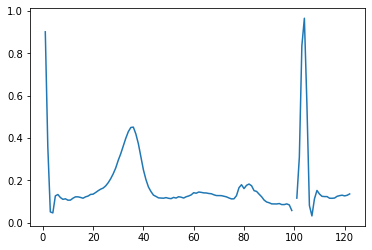

In [0]:
plt.plot(y)

In [0]:
def plot_me(condition, inputi):
  import plotly.graph_objects as go
    # Create an empty list 
  x = [] 
  y = []
    
  # Iterate over each row 
  for index in condition[:0]: 
      x.append(index) 
    
  # Print the list 
  print(x) 

  df_list = condition.values.tolist()
  y = df_list[inputi]
  print(y)

  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=x,
      y=y,
      name = "heartbeat", # Style name/legend entry with html tags
      connectgaps=True # override default to connect the gaps
  ))

  return fig.show()
plot_me(abnormaldf,50)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
[0.9768637418746946, 0.6148632764816284, 0.41668614745140087, 0.2617433965206146, 0.22131338715553284, 0.12993690371513367, 0.11498013883829117, 0.11007244884967807, 0.1

In [0]:
plot_me(abnormaldf, 24)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
[nan, 0.2915632724761963, 0.2431761771440506, 0.5155087113380432, 0.4385856091976166, 0.377791553735733, 0.2636476457118988, 0.2437965273857117, 0.2456575632095337, 0.26

In [0]:
plot_me(abnormaldf, 60)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
[nan, 0.756460428237915, 0.5285826325416564, 0.1581832468509674, 0.027799529954791073, 0.02897415868937969, 0.09631949663162233, 0.1609240472316742, 0.1816758066415787, 

In [0]:
plot_me(normaldf, 200)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
[nan, 0.9519423246383668, 0.35002002120018005, 0.20464557409286496, 0.16740088164806366, 0.18622346222400665, 0.25951141119003296, 0.2919503450393677, 0.2947537004947662

### First pair time and values as X Y
then append patient_id as z

In [0]:
x_time      = []
y_value     = []
z_patientid = []

matrix = []

def pair_xy(condition, inx, iny, inz):
  for z in condition.T:
    print("Printing for ", z)
    for index, y in enumerate(condition.iloc[z]):
      inz.append(z)
      iny.append(y)
      inx.append(index)
      print(y)

pair_xy(normaldf,x_time,y_value,z_patientid)

    #a = normaldf.iloc[0]
    #

Streaming output truncated to the last 5000 lines.
0.385840356349945
0.1818879544734955
0.1724865734577179
0.1901381462812424
0.18860322237014768
0.18534152209758759
0.1782425194978714
0.1843822002410889
0.18687644600868225
0.1864927113056183
0.1897544115781784
0.1887950897216797
0.1933998465538025
0.19282424449920652
0.19435916841030118
0.20088258385658264
0.2020337730646133
0.21373753249645236
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Printing for  4020
nan
0.5162822008132933
0.1689280867576599
0.013229307718574999
0.03290366381406784
0.07123473286628723
0.07123473286628723
0.0702170953154564
0.06818182021379471
0.07123473286628723
0.06919945776462555
0.07293079793453217
0.08141112327575682
0.08141112327575682
0.08344640582799911
0.08412483334541322
0.0844640433

In [0]:
matrix = [x_time, y_value]
matrix
df = pd.DataFrame({
    'time': x_time,
    'value': y_value,
    'patient_id': z_patientid
  })
df

,time,value,patient_id
0,0,NaN,0
1,1,0.900324,0
2,2,0.358590,0
3,3,0.051459,0
4,4,0.046596,0
...,...,...,...
760643,183,NaN,4045
760644,184,NaN,4045
760645,185,NaN,4045
760646,186,NaN,4045


In [0]:
df.loc[df['patient_id'] == 1]

,time,value,patient_id
188,0,NaN,1
189,1,0.794681,1
190,2,0.375387,1
191,3,0.116883,1
192,4,NaN,1
...,...,...,...
371,183,NaN,1
372,184,NaN,1
373,185,NaN,1
374,186,NaN,1


In [0]:
# select only 9
to_plot = df[df['patient_id'].between(0,2)].dropna()
to_plot

,time,value,patient_id
1,1,0.900324,0
2,2,0.358590,0
3,3,0.051459,0
4,4,0.046596,0
5,5,0.126823,0
...,...,...,...
536,160,0.227598,2
537,161,0.238842,2
538,162,0.249063,2
539,163,0.254514,2


In [0]:
fig = px.line_3d(to_plot, x="patient_id", y="time", z="value", color="patient_id", template="plotly_dark")
fig.show()

### Make it into a function  

In [0]:
x_time_ab      = []
y_value_ab     = []
z_patientid_ab = []

def pair_xy(condition, inx, iny, inz):
  for z in condition.T:
    for index, y in enumerate(condition.iloc[z]):
      inz.append(z)
      iny.append(y)
      inx.append(index)
      print("Transferring: ", "patient number: ", z, end='\r')
      

pair_xy(abnormaldf,x_time_ab,y_value_ab,z_patientid_ab)

In [0]:
def plot_conditions(range1, range2, x_in, y_in, z_in):
  df = pd.DataFrame({
      'time': x_in,
      'value': y_in,
      'patient_id': z_in
    })
  df

  to_plot = df[df['patient_id'].between(range1,range2)].dropna()
  

  fig = px.line_3d(to_plot, x="patient_id", y="time", z="value", color="patient_id", template="plotly_dark")
  return fig.show()

#plot with the perimeters of heart condition dataset, and range1 to range2
plot_conditions(23,25, x_time_ab,y_value_ab,z_patientid_ab)


## normal, abnormal compare 



In [0]:
def make_wave(r1,r2,nt_in,nv_in,np_in,abt_in,abv_in,abp_in ):
  df = pd.DataFrame({
      'n_time'     : nt_in,
      'n_value'    : nv_in,
      'n_patient'  : np_in,
      'ab_time'    : abt_in,
      'ab_value'   : abv_in,
      'ab_patient' : abp_in
  })

  df

  to_plot = df[df['n_patient'].between(r1,r2)].dropna()

  return print('pwav')


## K means cluster

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns #Python library for Vidualization

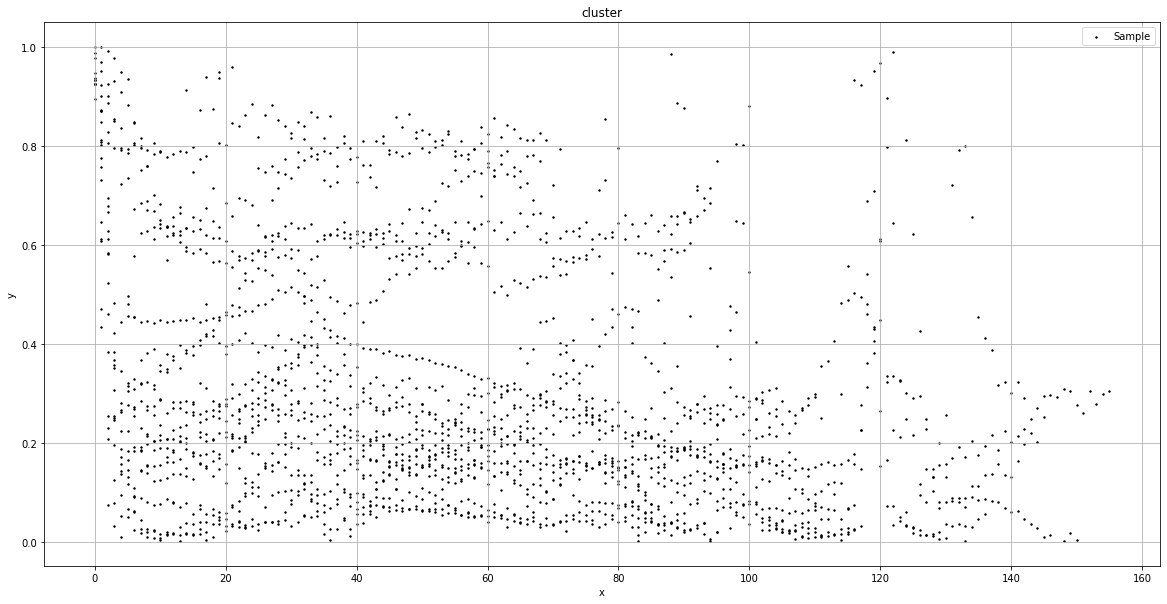

In [0]:
def k_means(range1, range2, x_in, y_in, z_in):
  df = pd.DataFrame({
      'time': x_in,
      'value': y_in,
      'patient_id': z_in
    })
  df

  to_plot = df[df['patient_id'].between(range1,range2)].dropna()
  x = to_plot['time']
  y = to_plot['value']
  plt.figure(figsize=(20,10))
  plt.scatter(x, y, s = 2, c = 'black', label = 'Sample')
  plt.title('cluster')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.grid()
  return plt.show()


#plot with the perimeters of heart condition dataset, and range1 to range2
k_means(0,20, x_time_ab,y_value_ab,z_patientid_ab)


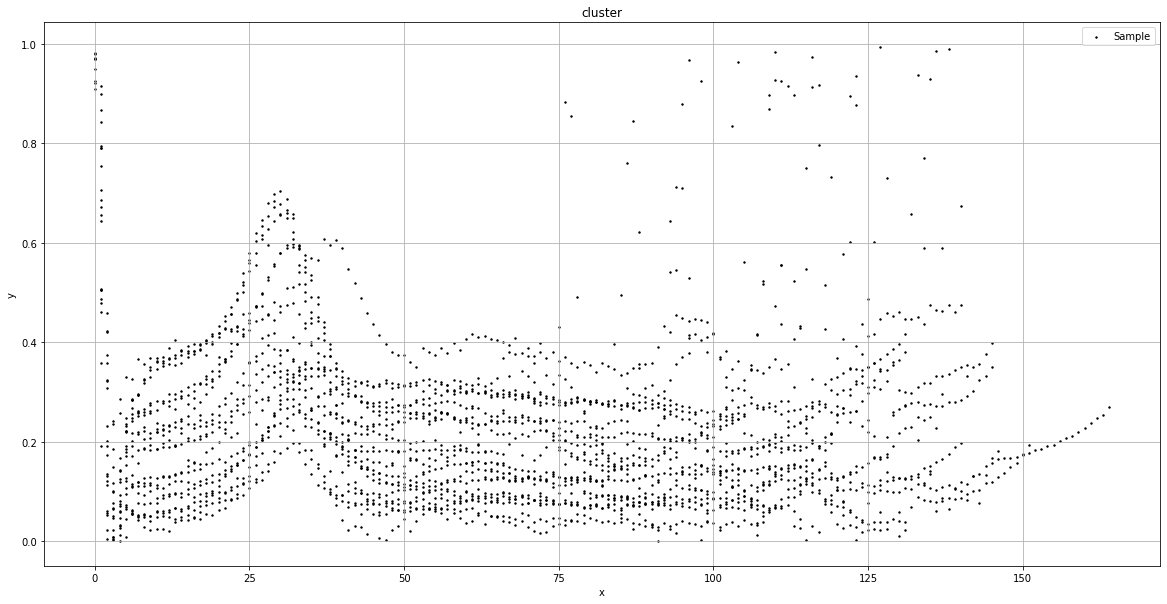

In [0]:
k_means(0,20, x_time,y_value,z_patientid)


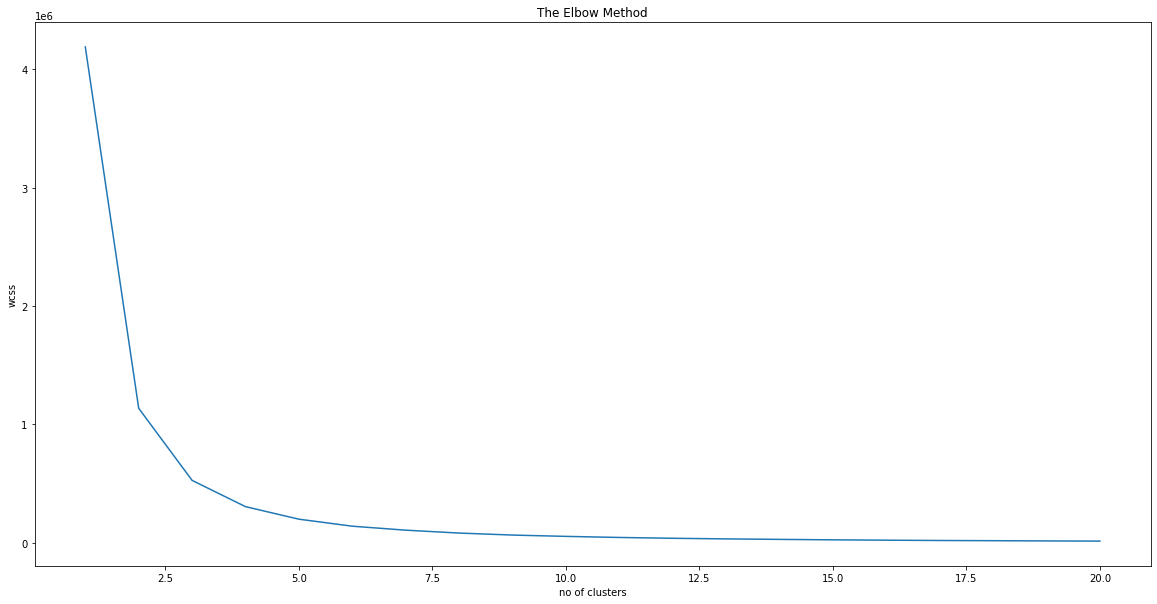

In [0]:
def elbow(range1, range2, x_in, y_in, z_in):
  df = pd.DataFrame({
      'time': x_in,
      'value': y_in,
      'patient_id' : z_in
    })
  df
  to_plot = df[df['patient_id'].between(range1,range2)].dropna()
  x= to_plot.drop(columns=['patient_id'])
  from sklearn.cluster import KMeans
  wcss=[]
  #we always assume the max number of cluster would be 10
  #you can judge the number of clusters by doing averaging
  ###Static code to get max no of clusters

  for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42,max_iter=10000,tol=0.000001)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

  #inertia_ is the formula used to segregate the data points into clusters

  #Visualizing the ELBOW method to get the optimal value of K 
  plt.figure(figsize=(20,10))
  plt.plot(range(1,21), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('no of clusters')
  plt.ylabel('wcss')
  return plt.show()

# elbow 
elbow(0,20, x_time,y_value,z_patientid)


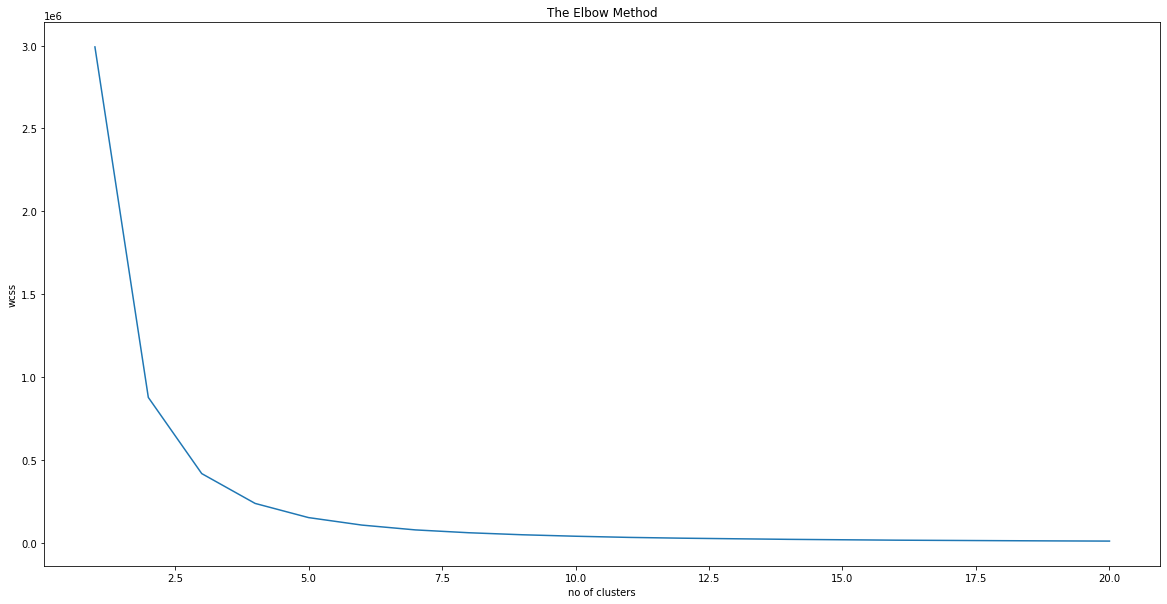

In [0]:
elbow(0,20, x_time_ab,y_value_ab,z_patientid_ab)


[[     0    932]
 [  1000    869]
 [  2000    886]
 ...
 [101000    146]
 [102000    145]
 [103000    108]]
[3 3 3 ... 4 4 4]
[[ 64778    284]
 [ 38502    312]
 [128531    266]
 [ 12862    310]
 [ 92938    284]]


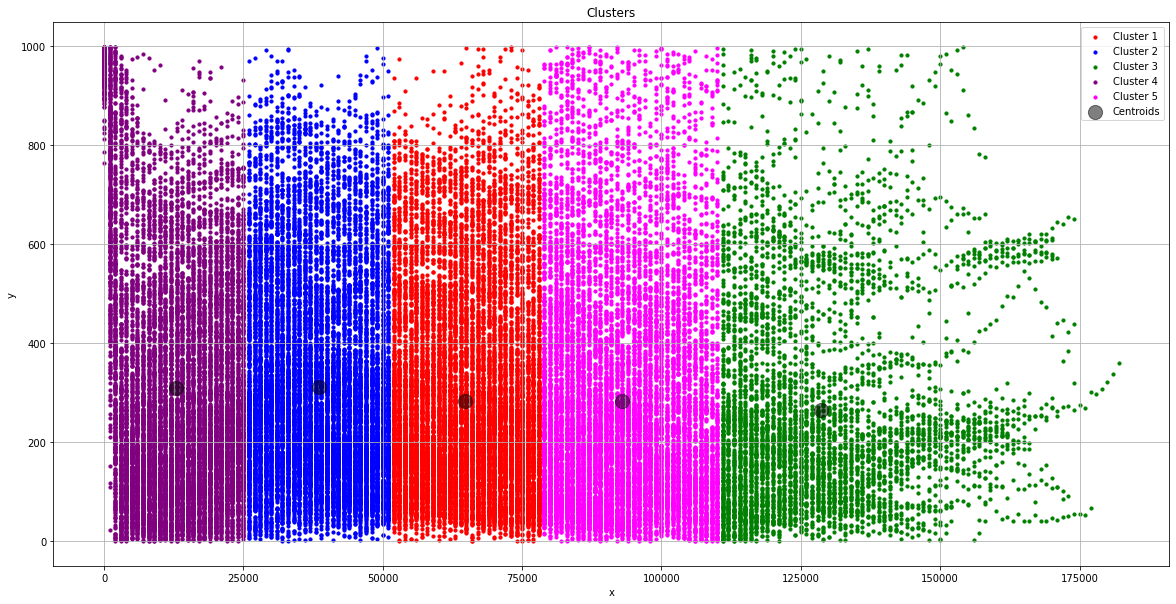

In [0]:
def cluster_me(range1, range2, x_in, y_in, z_in):
  from sklearn.cluster import KMeans
  df = pd.DataFrame({
      'time': x_in,
      'value': y_in,
      'patient_id' : z_in
    })
  df
  to_plot = df[df['patient_id'].between(range1,range2)].dropna()
  drop_this = to_plot.drop(columns=['patient_id']) * 1000
  X = drop_this.iloc[:, [0,1]].values.astype(int)

  #Model Build
  kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
  y_kmeans= kmeansmodel.fit_predict(X)
  kmeans= kmeansmodel.fit(X)

  #showing the cluster to which the point belongs
  #y_kmeans = np.array(y_kmeans)
  #Centroid position
  centers_float = kmeans.cluster_centers_
  centers=np.rint(centers_float).astype(int)
  #X = np.array(centers)

  print(X)

  print(y_kmeans)

  print(centers)

  size = 10

  plt.figure(figsize=(20,10))
  plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = size, c = 'red', label = 'Cluster 1')
  plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = size, c = 'blue', label = 'Cluster 2')
  plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = size, c = 'green', label = 'Cluster 3')
  plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = size, c = 'purple', label = 'Cluster 4')
  plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = size, c = 'magenta', label = 'Cluster 5') 
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,label = 'Centroids');
  plt.title('Clusters')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.grid()
  plt.show()

cluster_me(0,500, x_time_ab,y_value_ab,z_patientid_ab)


[[  1000    900]
 [  2000    358]
 [  3000     51]
 ...
 [183000     60]
 [184000     62]
 [185000     66]]
[0 0 0 ... 4 4 4]
[[ 15388    246]
 [102765    203]
 [ 73954    180]
 [ 45000    235]
 [134447    221]]


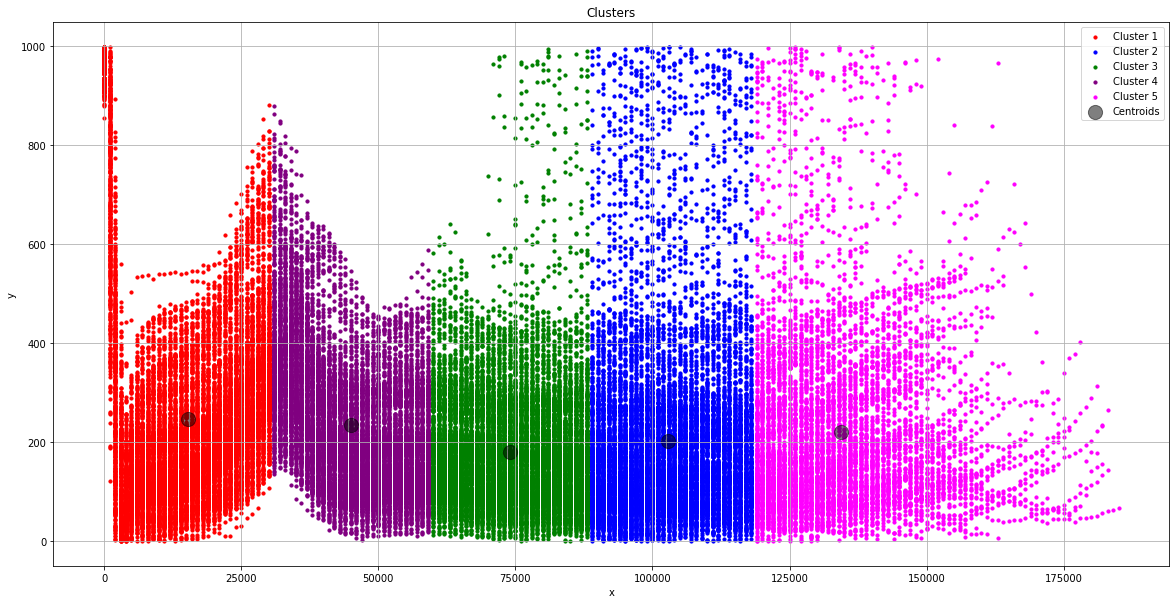

In [0]:
cluster_me(0,500, x_time,y_value,z_patientid)
